
# <center><font color= #F08080 > <b>CU34_Predicción de demanda de servicios</font></center>

#  <font color='green'>IV. Model development</font>

En este anexo se incluye el código utilizado durante el desarrollo 
de los modelos incluidos en el caso de uso.

In [1]:
Sys.setlocale(category = "LC_ALL", locale = "es_ES.UTF-8")

[1] "es_ES.UTF-8/es_ES.UTF-8/es_ES.UTF-8/C/es_ES.UTF-8/C"

## Modelo CLUSTER

## Paquetes



In [2]:
library(readr)
library(FactoMineR)
library(factoextra)
library(dplyr)
library(tidyr)
library(janitor)
library(cluster)
library(DT)

Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




## Datos

In [3]:
datos <- read_csv("CU_34_05_05_servicios_completo.csv")

# fechaclus <- "2022-01-01"
# set.seed(1)
# municlus <- sample(datos$CMUN, 1)

# apply(datos, 2, \(x) sum(is.na(x)))

datosclust <- datos |> 
  # filter(Fecha == as.Date(fechaclus)) |>
  # filter(CMUN == municlus) |>
  drop_na() |> 
  # select(-c(Fecha:CSEC, ccaa, CPRO, NSEC)) |> 
  remove_constant() 

Rows: 274792 Columns: 33
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (5): Servicio, CMUN, CDIS, CSEC, NSEC
dbl  (27): Futbol, nservicios, capacidad, tmed, prec, velmedia, presMax, cca...
date  (1): Fecha

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## Cluster

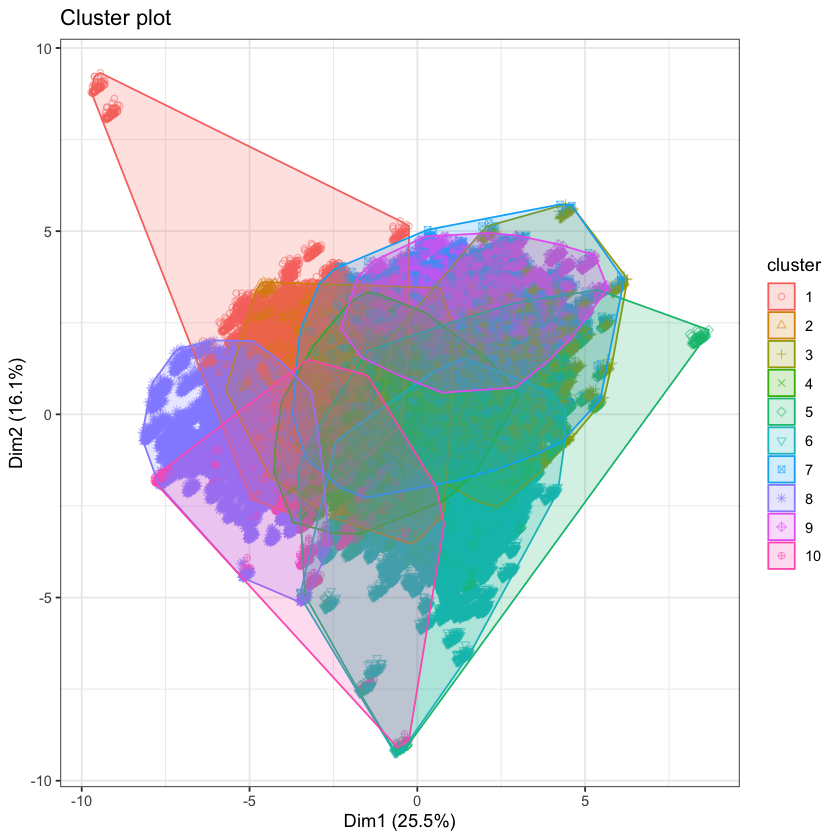

In [4]:
zdatosclust <- datosclust |> 
  select(-c(Fecha:CSEC, NSEC)) |>
  scale()

# km <- kmeans(datosclust, 4)
km <- clara(zdatosclust, 10)
# plot(km)
fviz_cluster(km, geom = "point", alpha = 0.5) +
  theme_bw()

datos2 <-  datosclust |> 
  mutate(cluster = km$clustering) |> 
  relocate(cluster, NSEC, .before = 1)


## Output

In [5]:
## TABLA CARACTERIZACIÓN
datos2 |> 
  group_by(cluster) |> 
  summarise(across(Futbol:densidad_hab_km2, median)) |> 
  datatable()

## TABLA DETALLE MUNICIPIO
datos2 |> 
  filter(CMUN == "079")

## DATOS PARA MAPA

datos2 |> 
  group_by(NSEC, CMUN, CDIS, CSEC, cluster) |>
  summarise(n = n()) |> 
  rowwise() |> 
  slice_max(n) |> 
  ungroup() |> 
  datatable()

## guardar datos

write_rds(datos2, "output_cluster.rds")
write_rds(km, "modelo_cluster.rds")


HTML widgets cannot be represented in plain text (need html)

cluster,NSEC,Fecha,Servicio,CMUN,CDIS,CSEC,Futbol,nservicios,capacidad,...,t6_1,t7_1,t8_1,t9_1,t10_1,t11_1,t12_1,area,elevation,densidad_hab_km2
<int>,<chr>,<date>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7,Madrid - 01.001,2022-01-01,Taxi,079,01,001,1,50,69,...,0.2381,0.0482,0.0425,0.6364,0.1129,0.4674,0.5269,657639.72,624,1762.363
6,Madrid - 01.002,2022-01-01,Taxi,079,01,002,0,3,69,...,0.3660,0.0639,0.0627,0.6071,0.1182,0.5385,0.6107,27435.08,649,32367.323
6,Madrid - 01.003,2022-01-01,Taxi,079,01,003,0,1,69,...,0.3798,0.0660,0.0592,0.5663,0.1126,0.5009,0.5645,74301.89,635,23458.353
3,Madrid - 01.004,2022-01-01,Taxi,079,01,004,0,0,69,...,0.2577,0.0619,0.0559,0.6424,0.1284,0.4831,0.5542,50295.93,624,25310.200
4,Madrid - 01.006,2022-01-01,Taxi,079,01,006,0,5,69,...,0.2769,0.0604,0.0516,0.6834,0.1005,0.5179,0.5758,49203.24,624,34794.460
3,Madrid - 01.007,2022-01-01,Taxi,079,01,007,0,6,69,...,0.2005,0.0617,0.0550,0.6510,0.1045,0.5060,0.5651,21535.71,624,38215.593
3,Madrid - 01.008,2022-01-01,Taxi,079,01,008,0,5,69,...,0.2784,0.0545,0.0433,0.6215,0.1324,0.5126,0.5908,27662.17,635,28052.753
7,Madrid - 01.009,2022-01-01,Taxi,079,01,009,1,51,69,...,0.2683,0.0427,0.0381,0.6768,0.1097,0.5610,0.6301,69377.11,624,20309.293
4,Madrid - 01.011,2022-01-01,Taxi,079,01,011,0,2,69,...,0.2685,0.0659,0.0569,0.6024,0.1401,0.5395,0.6274,46897.87,624,23028.763


`summarise()` has grouped output by 'NSEC', 'CMUN', 'CDIS', 'CSEC'. You can
override using the `.groups` argument.


HTML widgets cannot be represented in plain text (need html)